In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from utilities import calculate_psnr, calculate_rmse, calculate_ssim

In [3]:
# for model_path in model_paths:
#     fakes = np.sort(glob(os.path.dirname(model_path)+"/results/*"))
#     for fake in fakes:
        # im = Image.open(fake)
        # im1 = np.array(im)
        # print(im1)
        # im = im.convert('L')
        # im = np.array(im)

        # np.save(fake.replace(".png", ""), im)
        # os.system(f"rm {fake}")

# for model_path in model_paths:
#     key = os.path.basename(os.path.dirname(model_path))
#     fakes = np.sort(glob(os.path.dirname(model_path)+"/results/*.npy"))
#     rmse[key] = 0
#     for gt, fake, mask in zip(images, fakes, masks):
#         fake = np.load(fake)
#         gt = np.load(gt)
#         mask = np.load(mask)
#         rmse[key] += calculate_rmse(gt, fake, mask)/100

checkpoint/model1/finetune/20000+666/g_final.pth
min pixel value in inpaint:  0.0
max pixel value in inpaint:  0.99609375
min pixel value in gt:  0.0
max pixel value in gt:  0.99609375
max pixel value in diff:  0.0


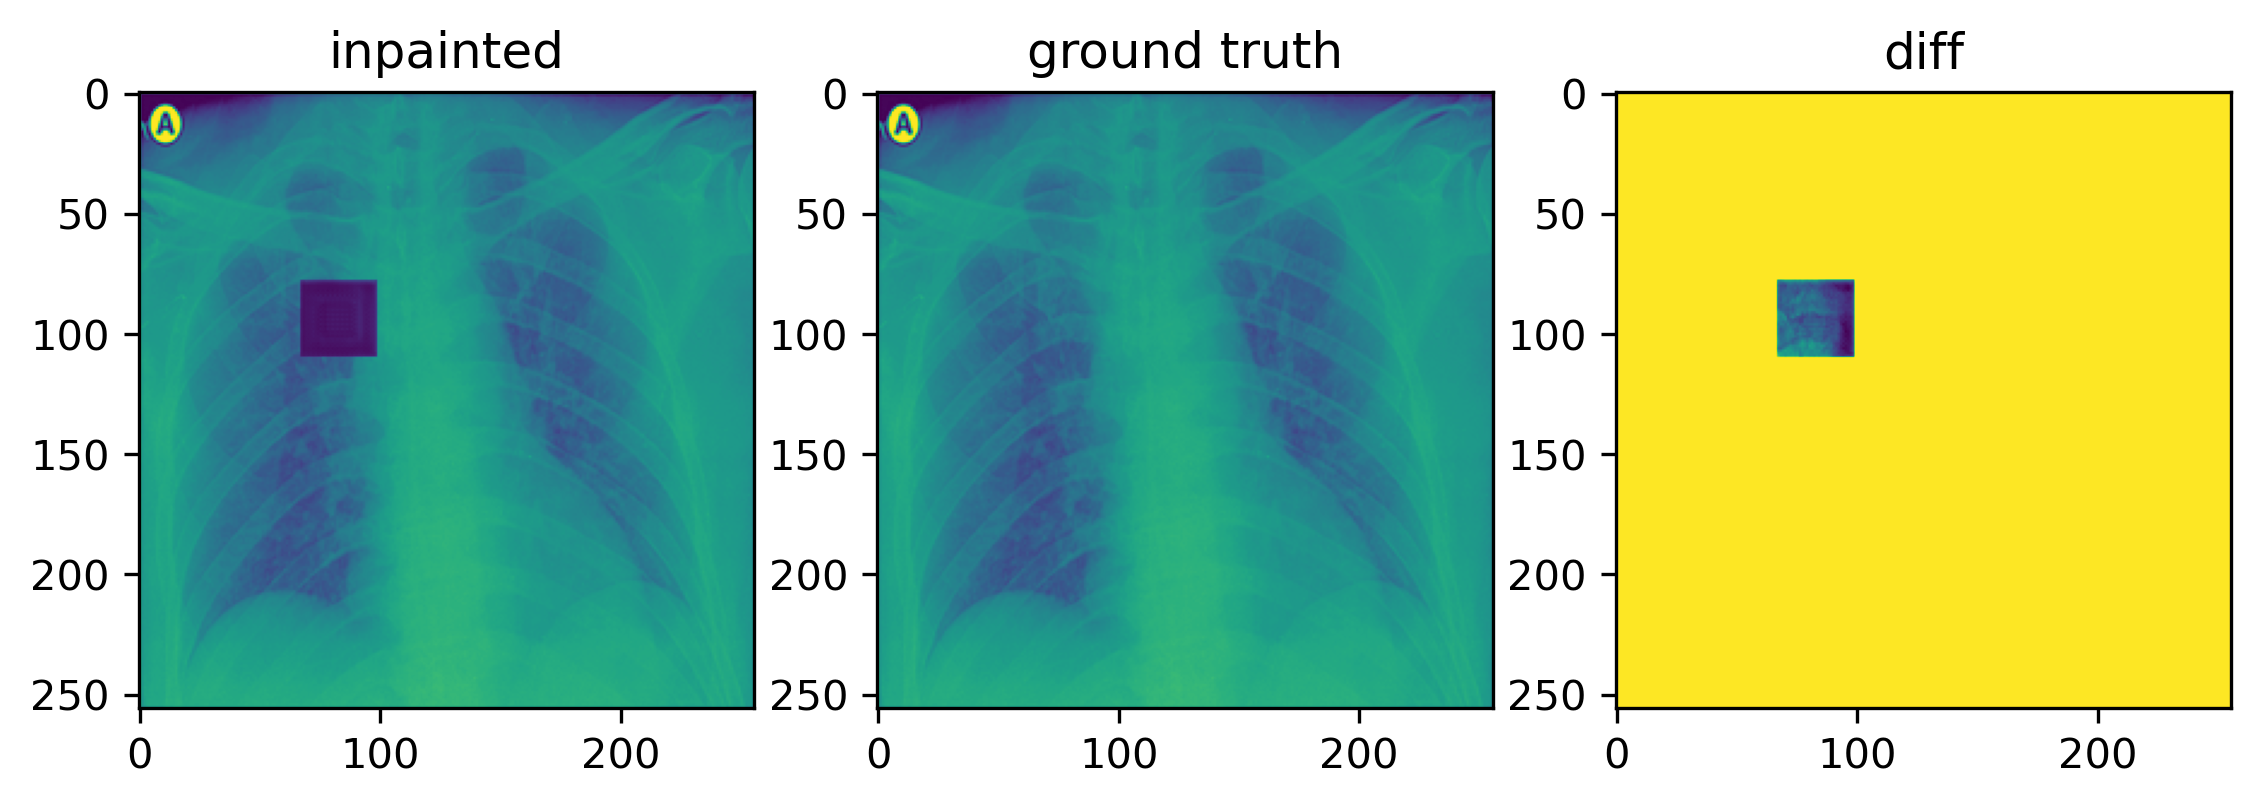

In [17]:
model_paths = np.sort(glob("checkpoint/model1/finetune/**/g_final.pth", recursive=True))
rmse = {}
for model_path in model_paths:
    model_path = "checkpoint/model1/finetune/20000+666/g_final.pth"
    print(model_path)
    key = os.path.basename(os.path.dirname(model_path))
    gts = np.sort(glob(os.path.dirname(model_path)+"/results/gt_*.npy"))
    fakes = np.sort(glob(os.path.dirname(model_path)+"/results/img_*.npy"))
    masks = np.sort(glob(os.path.dirname(model_path)+"/results/mask_*.npy"))
    # gts = np.sort(glob("results/results/gt_*.npy"))
    # fakes = np.sort(glob("results/results/img_*.npy"))
    # masks = np.sort(glob("results/results/mask_*.npy"))
    rmse[key] = 0
    counter = 0
    for gt, fake, mask in zip(gts, fakes, masks):
        fake = np.load(fake)
        gt = np.load(gt)
        mask = np.ma.make_mask(np.load(mask)[:, :, 0])
        rmse[key] += calculate_rmse(gt, fake, mask)/100
        plt.figure(figsize=(9,3), dpi=300)
        plt.subplot(1,3,1)
        plt.imshow(fake)
        plt.title("inpainted")
        print("min pixel value in inpaint: ", np.min(fake))
        print("max pixel value in inpaint: ", np.max(fake))
        plt.subplot(1,3,2)
        plt.imshow(gt)
        plt.title("ground truth")
        print("min pixel value in gt: ", np.min(gt))
        print("max pixel value in gt: ", np.max(gt))
        plt.subplot(1,3,3)
        plt.imshow((fake-gt))
        plt.title("diff")
        print("max pixel value in diff: ", np.max((fake-gt)))
        counter += 1
        # if counter > 10:
        break
    break

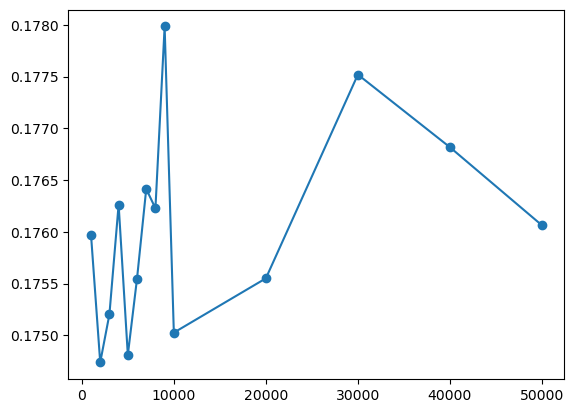

In [13]:
x = np.array([int(x.split("+")[0]) for x in rmse.keys()])
sort = np.argsort(x)
x = x[sort]
y = np.array([float(y) for y in rmse.values()])
y = y[sort]
plt.scatter(x, y)
plt.plot(x,y)